# Modeling Methodology (and other userful concepts)

Topics Covered:
* Generalizability
* Train/Validation/Test Split
* Baseline Models
* Overfitting
* Bias-Variance Tradeoff
* Decision Boundaries
* Probability Thresholds
* Modeling Methodology Steps
* Overfitting Evaluation Exercise

**What is a machine learning Model?**

A machine learning model is a program that can find patterns or make decisions from a **previously unseen dataset**. For example, in natural language processing, machine learning models can parse and correctly recognize the intent behind previously unheard sentences or combinations of words. In image recognition, a machine learning model can be taught to recognize objects - such as cars or dogs. A machine learning model can perform such tasks by having it **'trained' with a large dataset**. During training, the machine learning algorithm is **optimized to find certain patterns or outputs from the dataset**, depending on the task. The output of this process - often a computer program with specific rules and data structures - is called a machine learning model.

[Source: Databricks](https://www.databricks.com/glossary/machine-learning-models)

Modeling Methodology:

1. Contextualise machine learning problem & class domain
2. Identify and prepare the training dataset
3. **Split the prepared dataset into training and evaluation set(s)**
4. Explore the data and choose the type of algorithm(s) to explore
5. Prepare and clean the dataset 
6. **Perform machine learning optimization**
7. Deploy the model 

## Model Generalizability

The term ‘generalization’ refers to the model’s capability to adapt and react properly to previously unseen, new data, which has been drawn from the same distribution as the one used to build the model. In other words, generalization examines how well a model can digest new data and make correct predictions after getting trained on a training set.

How well a model is able to generalize is the key to its success. If you train a model too well on training data, it will be incapable of generalizing. In such cases, it will end up making erroneous predictions when it’s given new data. This would make the model ineffective even though it’s capable of making correct predictions for the training data set. This is known as overfitting. The inverse (underfitting) is also true, which happens when you train a model with inadequate data. In cases of underfitting, your model would fail to make accurate predictions even with the training data. This would make the model just as useless as overfitting.

To limit overfitting in a machine learning algorithm, two additional techniques that you can use are:

* Using a resampling method to estimate the accuracy of the model
* Holding back a validation dataset

[Source: MagniMind](https://magnimindacademy.com/blog/what-is-generalization-in-machine-learning/)

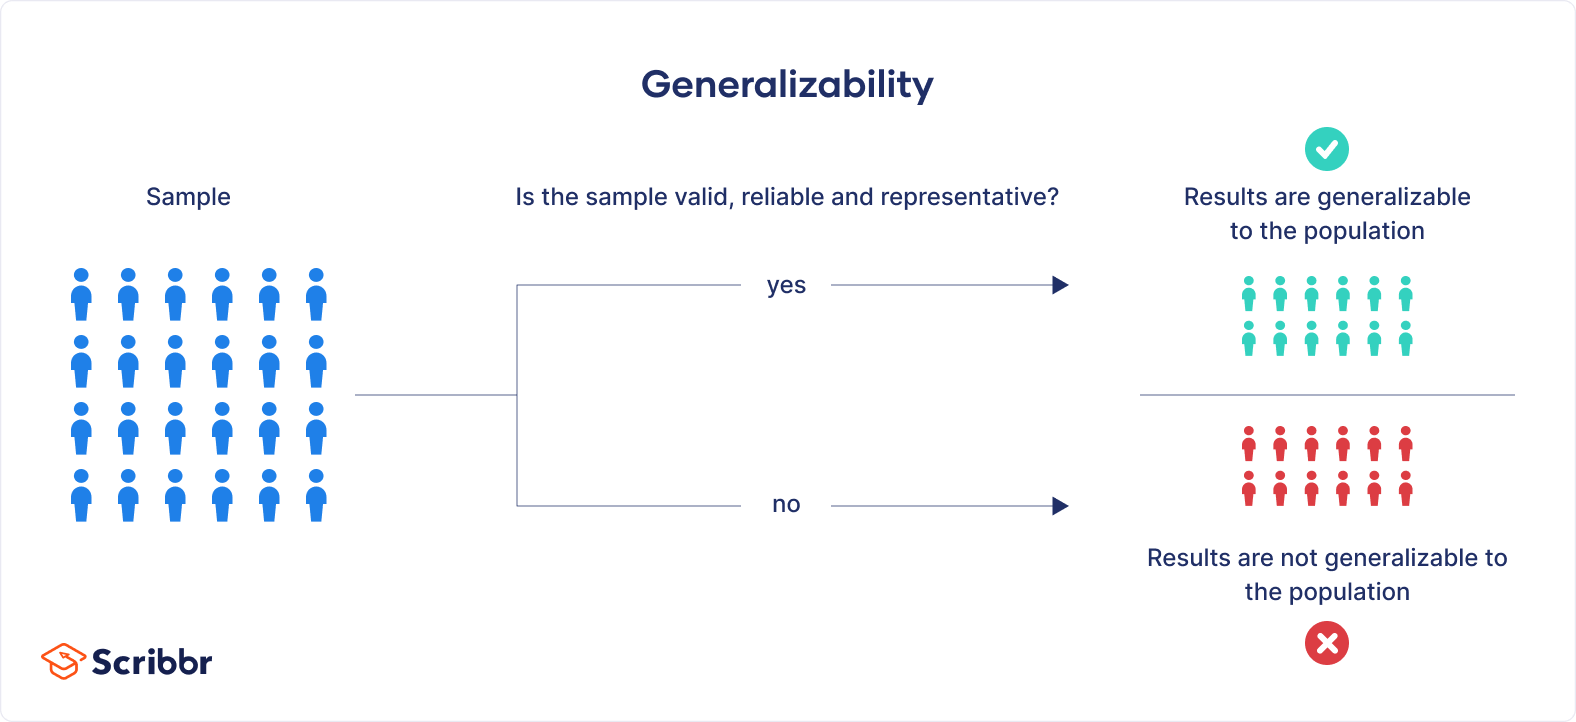

Key Terms & Concepts:
* Unseen Data
* Memorization vs Generalization

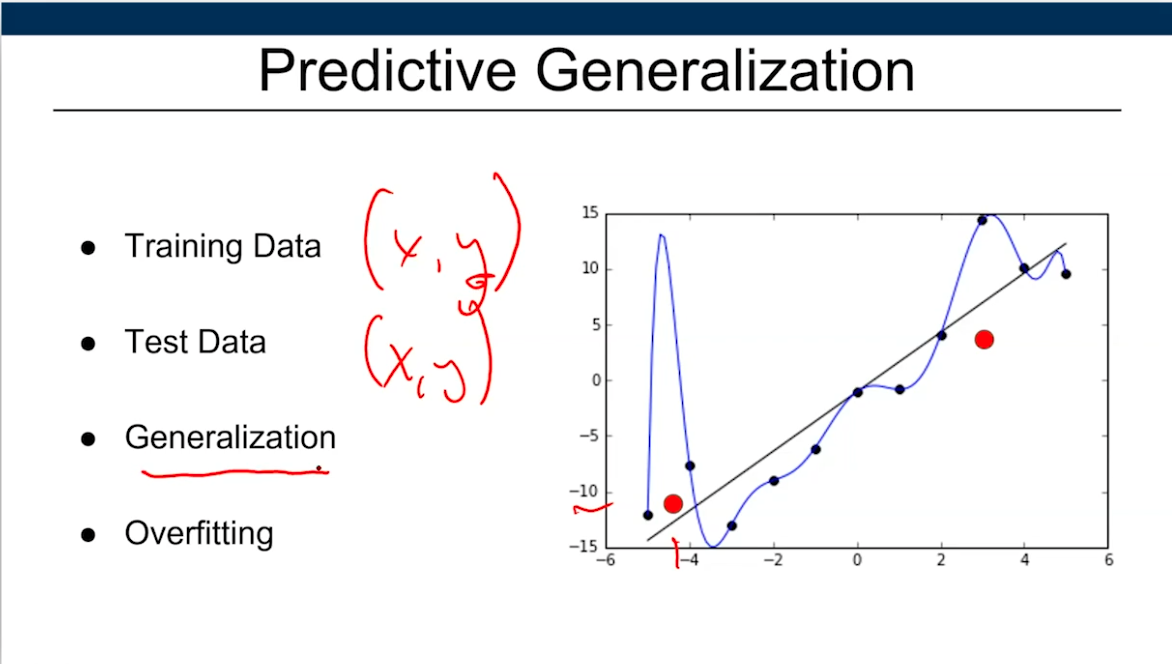

## Train/Validation/Test Split

The train-test split is a technique for **evaluating the performance of a machine learning algorithm**.

It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

Train Dataset: Used to fit the machine learning model.
Test Dataset: Used to evaluate the fit machine learning model.
The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

This is how we expect to use the model in practice. Namely, to fit it on available data with known inputs and outputs, then make predictions on new examples in the future where we do not have the expected output or target values.

The train-test procedure is appropriate when there is a **sufficiently large dataset available**.

[Source: MachineLearneingMastery](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/)

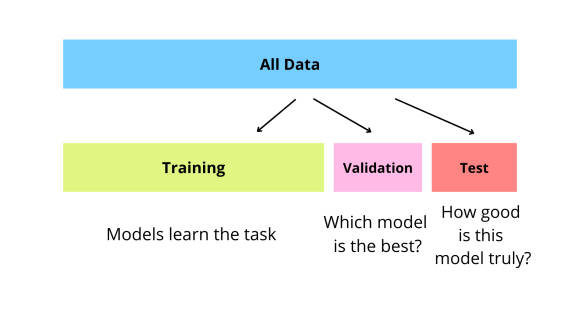

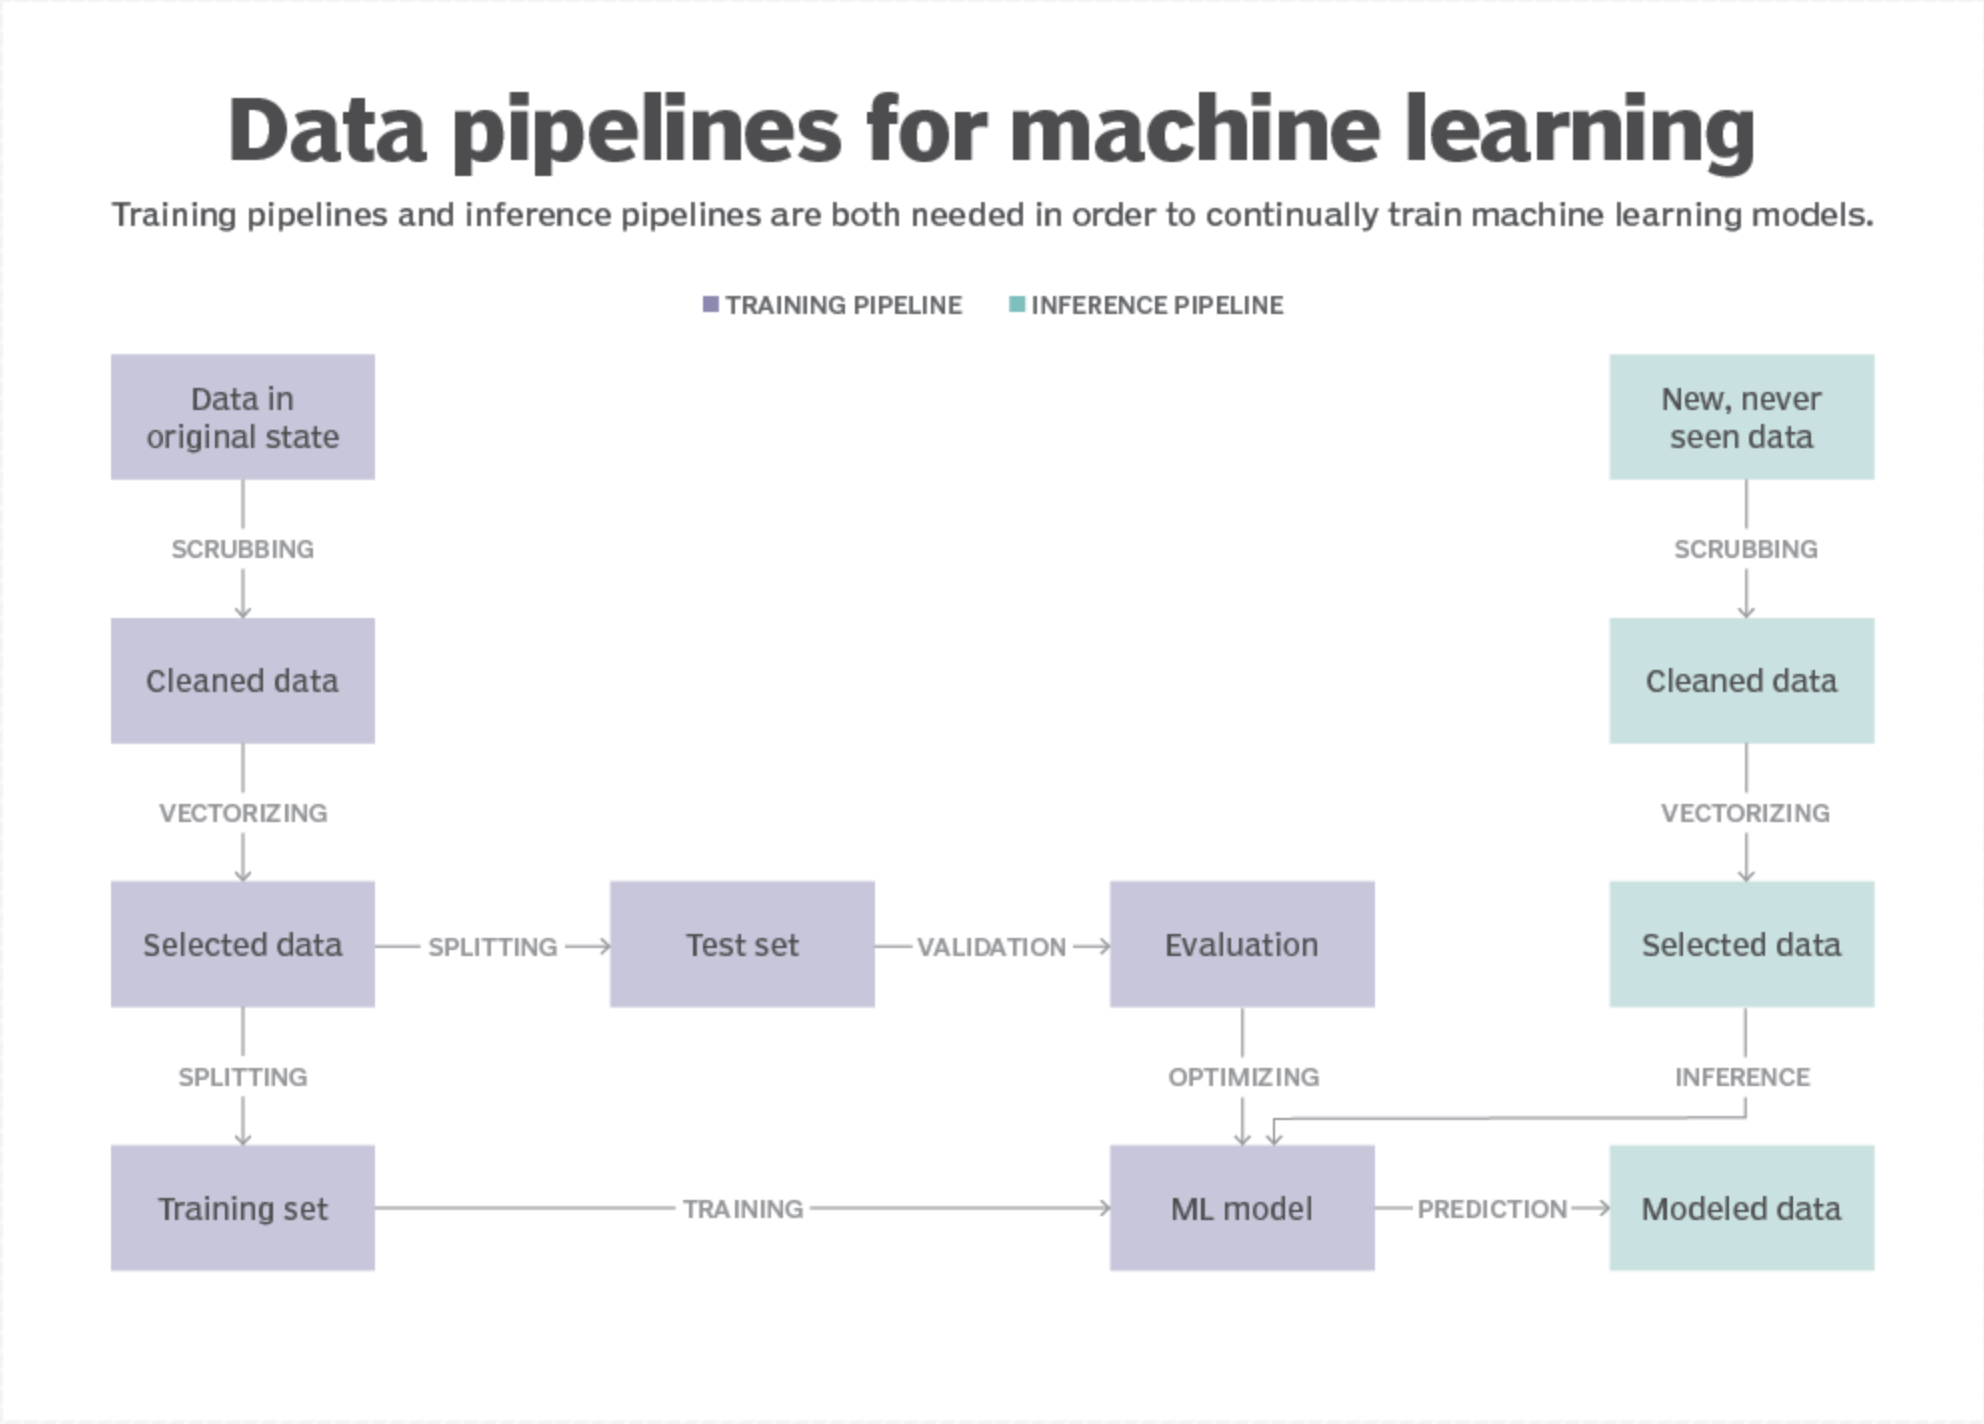

Sklearn Train/Test Split package: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [10]:
# Make some fake data
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X
list(y)

[0, 1, 2, 3, 4]

In [20]:
# split into train and test
import pandas as pd

dataset = pd.DataFrame(X.copy())
dataset['y'] = y

# Either pass the entire dataset and split into two datasets - train and test
train, test = train_test_split(dataset, test_size=0.33, random_state=42)

In [21]:
train.head()

0  1  y
2  4  5  2
0  0  1  0
3  6  7  3

In [23]:
train.shape

(3, 3)

In [22]:
test.head()

0  1  y
1  2  3  1
4  8  9  4

In [24]:
test.shape

(2, 3)

**Note:** The random state sets a *random seed* means that we will end up with the SAME exact samples each time - see the indices. This ensures *reproducibility* - that another experimented could run the same experiment and produce the same results. Test it out: Try to the train/test split without a random seed.

In [25]:
# Another way to split the data is by passing X and y and split into feature and target sets - this is convention
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
print(X_train.shape, len(y_train))

(3, 2) 3


In [35]:
print(X_test.shape, len(y_test))

(1, 2) 1


In [26]:
X_train

array([[4, 5],
       [0, 1],
       [6, 7]])

In [27]:
y_train

[2, 0, 3]

In [30]:
# Often times, we want to split into training, validation, and test. To do this, we have to run train/test split twice
# Note: We want a 60/20/20 split here
X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size=0.25)


In [33]:
print(X_train.shape, X_validate.shape, X_test.shape)

(3, 2) (1, 2) (1, 2)


**Note!** Be careful about the test_size parameter in the second train_test_split function. To get a 60/20/20 split, for example, you would need to first pass .2, then pass .25 . This is because 20% of the entire dataset is 25% of 80% of the dataset.

If we have 10 records and we want 2 in the test, 2 in validation, and 6 in training...

The first train_test_split will put 2 in test and 8 in train_validate dataset

the second train_test_split will put 2 in validate and 6 in with a sampling of 0.25 (2/8 is .25)

**Stratification**

One final consideration is for classification problems only.

Some classification problems do not have a **balanced number of examples for each class label**. As such, it is desirable to split the dataset into train and test sets in a way that **preserves the same proportions of examples** in each class as observed in the original dataset.

This is called a *stratified train-test split*.

We can achieve this by setting the “stratify” argument to the y component of the original dataset. This will be used by the train_test_split() function to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.

In [38]:
# NO STRATIFICATION
# split imbalanced dataset into train and test sets without stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# create dataset
X, y = make_classification(n_samples=100, weights=[0.94], flip_y=0, random_state=1)
print(Counter(y))

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 94, 1: 6})
Counter({0: 45, 1: 5})
Counter({0: 49, 1: 1})


In [39]:
# STRATIFICATION
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X, y = make_classification(n_samples=100, weights=[0.94], flip_y=0, random_state=1)
print(Counter(y))
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 94, 1: 6})
Counter({0: 47, 1: 3})
Counter({0: 47, 1: 3})


Key Terms & Concepts: 
* Test vs Validation set
* Random seed
* Reproducibility
* Stratification

## Build a Baseline Model

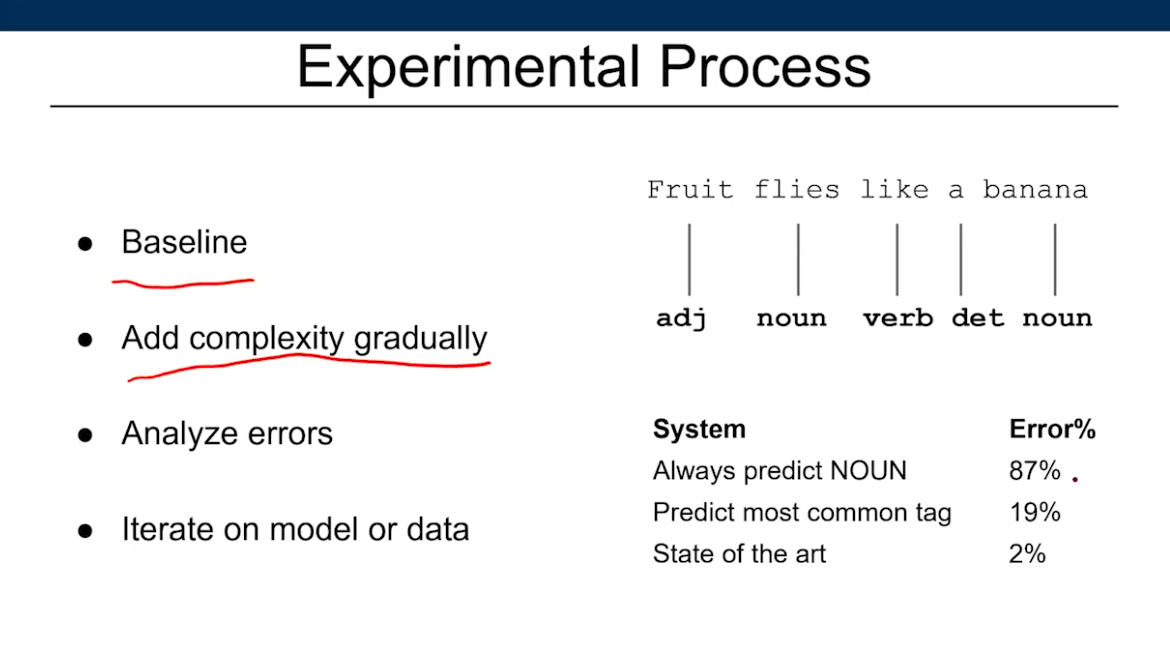

## Overfitting

**What is Overfitting?**

Overfitting is an undesirable machine learning behavior that occurs when the machine learning model gives accurate predictions for training data but not for new data. When data scientists use machine learning models for making predictions, they first train the model on a known data set. Then, based on this information, the model tries to predict outcomes for new data sets. An overfit model can give inaccurate predictions and cannot perform well for all types of new data.

[Source: AWS](https://aws.amazon.com/what-is/overfitting/#:~:text=Overfitting%20is%20an%20undesirable%20machine,on%20a%20known%20data%20set.)

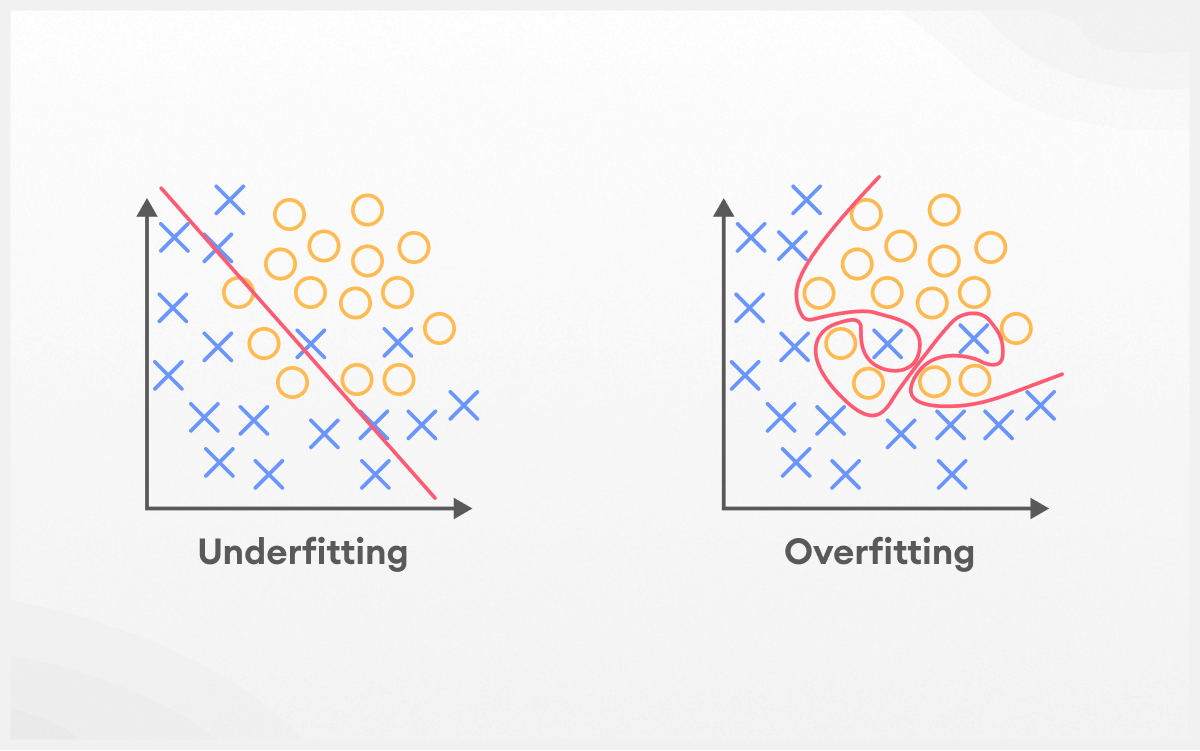

## Bias-Variance Tradeoff

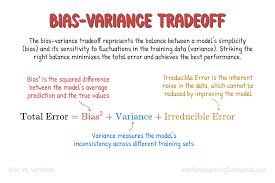

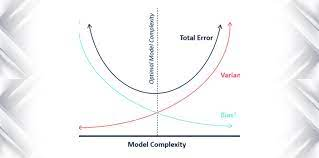

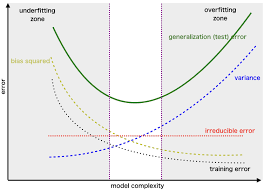

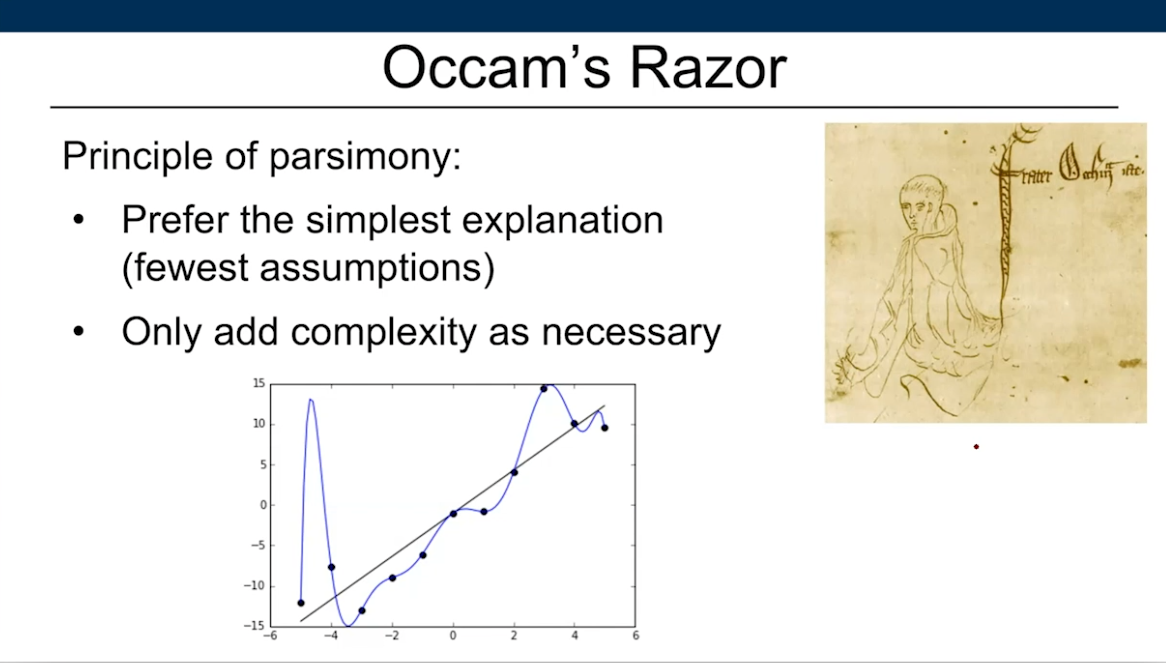

## Decision Boundaries

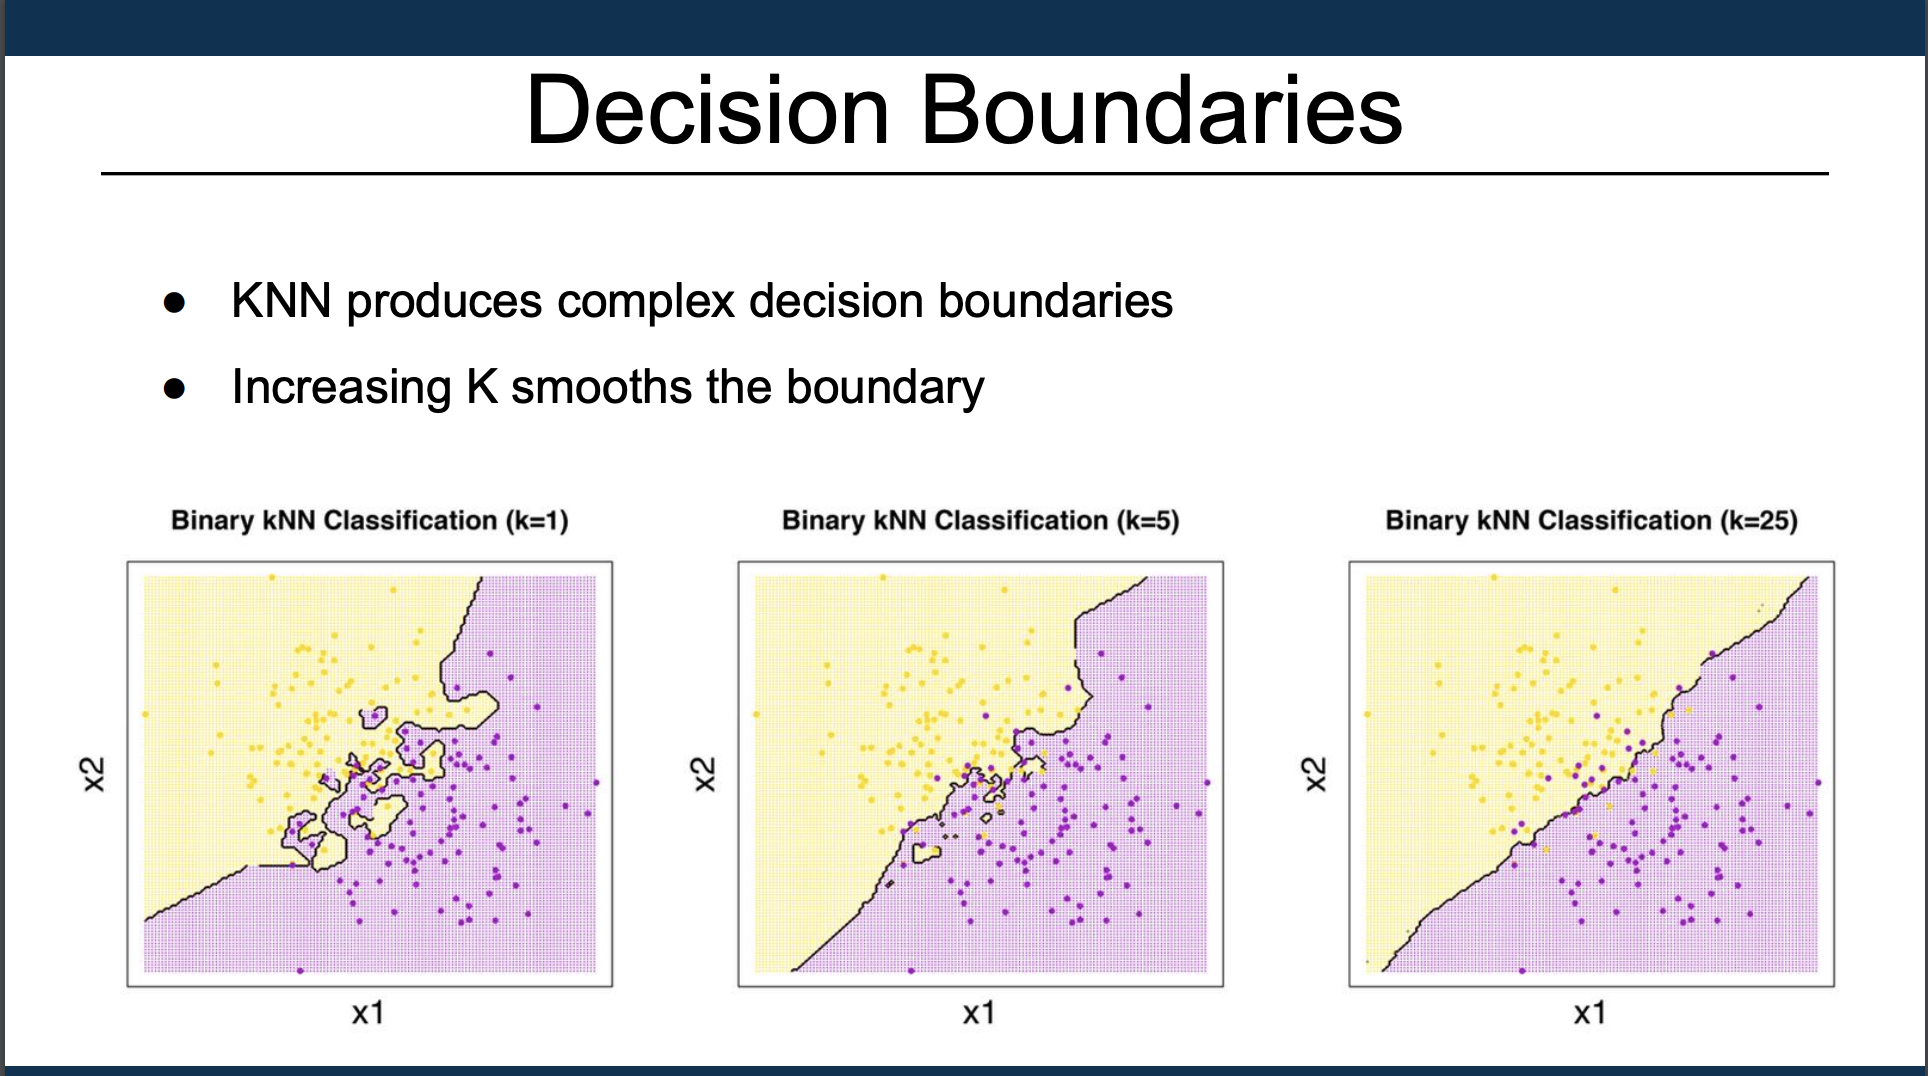

## Probability Thresholds

Many machine learning algorithms are capable of **predicting a probability** or a scoring of class membership.

This is useful generally as it provides a **measure of the certainty or uncertainty** of a prediction. It also provides additional granularity over just predicting the class label that can be interpreted.

Some classification tasks require a crisp class label prediction. This means that even though a probability or scoring of class membership is predicted, it must be converted into a crisp class label.

The decision for converting a predicted probability or scoring into a class label is governed by a parameter referred to as the “decision threshold,” “discrimination threshold,” or simply the “threshold.” **The default value for the threshold is 0.5 for normalized predicted probabilities or scores in the range between 0 or 1**.

For example, on a binary classification problem with class labels 0 and 1, normalized predicted probabilities and a threshold of 0.5, then values less than the threshold of 0.5 are assigned to class 0 and values greater than or equal to 0.5 are assigned to class 1.

* Prediction < 0.5 = Class 0
* Prediction >= 0.5 = Class 1

The problem is that the default threshold may not represent an optimal interpretation of the predicted probabilities.

This might be the case for a number of reasons, such as:

* The predicted probabilities are not calibrated, e.g. those predicted by an SVM or decision tree.
* The metric used to train the model is different from the metric used to evaluate a final model.
* The class distribution is severely skewed.
* The cost of one type of misclassification is more important than another type of misclassification.

Worse still, some or all of these reasons may occur at the same time, such as the use of a neural network model with uncalibrated predicted probabilities on an imbalanced classification problem.

As such, there is often the need to change the default decision threshold when interpreting the predictions of a model.

[Source: MachineLearningMastery](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)

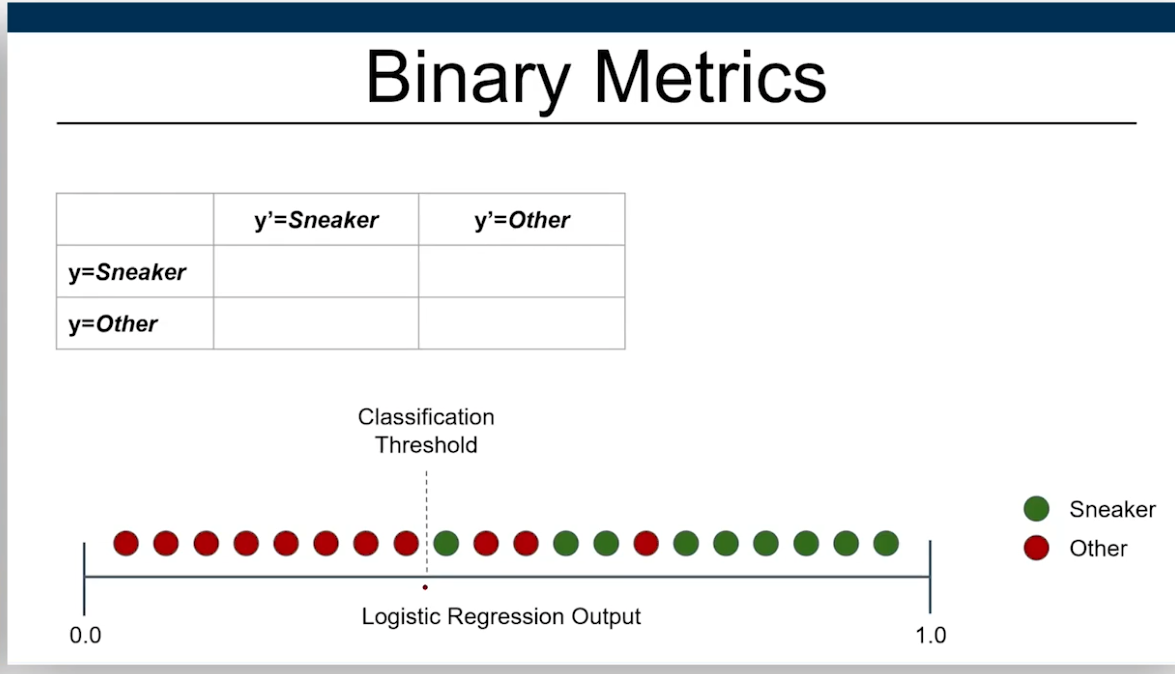

In [40]:
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

In [41]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

In [43]:
# fit a model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression()

In [44]:
# We can predict
model.predict(testX)

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
# Or, we can predict_proba to get the probabilities associated with each prediction
model.predict_proba(testX)

array([[9.92758703e-01, 7.24129721e-03],
       [9.96495510e-01, 3.50448974e-03],
       [9.99867566e-01, 1.32433775e-04],
       ...,
       [9.98780592e-01, 1.21940764e-03],
       [9.99705540e-01, 2.94459735e-04],
       [9.99603387e-01, 3.96613003e-04]])

**Notice..** the form of the predict_proba function is a 2-D array, where the first probability is the probabilitity of the 0 class, and the second probabilitity is the probability of the second class. The probabilities sum to 1. You can test this.

In [46]:
# store probabilities
lr_probs = model.predict_proba(testX)

In [47]:
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [49]:
from sklearn.metrics import roc_auc_score

# calculate scores
lr_auc = roc_auc_score(testy, lr_probs)

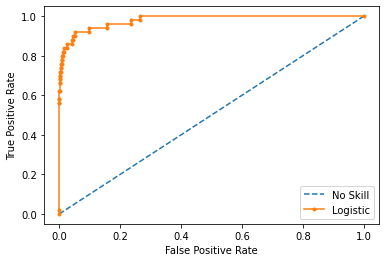

In [50]:
# roc curve for logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(testy, yhat)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

## Modeling Methodology Steps

First, read in your data. Then progess split the data before experimenting with features, model types, and hyper parameters.

**NOTE:** The purpose of a validation set is to compare performance across model classes. For hyperparameter selection, cross validation should be used.

**NOTE:** The purpsoe of a test set is to estimate how well the model will generalize to unseen data.

1. Train/Test Split
2. EDA
3. Data Preap, Feature Engineering & Feature Selection
4. Modeling Training & Hyperparameter Selection with Cross-Validation
5. Challenger Model Evaluation on Validation Set
6. Final Model Selection and One-Time Evaluation on Test Set
7. Deploy Model

In more detail...
1. Train/Validation/Test Split
2. Exploratory Data Analysis (EDA)
3. Data Prep & Data Wrangling
4. Feature Engineering
5. Feature Selection
6. Create a Final Pipeline (data prep, feature engineering, and feature selection)
7. Model Experimentation - build a baseline model first
8. Grid Search over Hyperparameters
9. Evaluation on Validation Set

## Breakout: Overfit A Model

# Breast Cancer Classification Model

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

Source: http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29

# Import required packages

In [52]:
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Get the data

In [53]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = pd.DataFrame(breast_cancer_wisconsin_diagnostic.data.features)
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [54]:
X.dtypes

radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimension3    float64
dtype: object

In [56]:
X.shape

(569, 30)

# Train Test Split

In [57]:
# convert to binary
y = (y !='B').astype(int)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Set up the pipeline

In [60]:
X.head()

radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
4      0.1980          0.10430     0.1809             0.05883  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0     17.33      184.60  2019.0       0.1622        0.6656      0.7119   
1     23.41      158.80  1956.0       0.1238        0.1866      0.2416   
2     25.53      152.50  1709.0       0.1444        0.4245      0.4504   
3     26.50       98.87   567.7       0.2098        0.8663      0.6869   
4     16.67      152.20  1575.0       0.1374        0.2050      0.4000   

   concave_points3  symmetry3  fractal_dimension3  
0           0.2654     0.4601             0.11890  
1           0.1860     0.2750             0.08902  
2           0.2430     0.3613             0.08758  
3           0.2575     0.6638             0.17300  
4           0.1625     0.2364             0.07678  

[5 rows x 30 columns]

In [59]:
X.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

In [63]:
cols = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3']

In [64]:
pipeline = Pipeline(steps=[
    ('preprocessing',
        ColumnTransformer(
            transformers=[
                ('impute', SimpleImputer(strategy='mean'), cols)], remainder='drop')),
    ('GBT', GradientBoostingClassifier(verbose=1))
    ])

# Set up the grid Search

Set the parameters for a grid search over the selected family of models.

In [65]:
# Currently only contains default values.  Commented parameters needn't be used
# in a grid search.
dct_grid = {
    'GBT__max_depth'    : [1, 5, 10, 20, 50, 100, 200, 500]
}

Search for the best model.

In [66]:
grid_search = GridSearchCV(pipeline, 
                           dct_grid, 
                           cv=3, 
                           return_train_score=False,
                           scoring=['accuracy', 'precision', 'average_precision', 'neg_log_loss'],
                           refit='accuracy', 
                           n_jobs=-1 
                  )
grid_search.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1744            0.11s
         2           1.0684            0.10s
         3           0.9784            0.10s
         4           0.9042            0.10s
         5           0.8388            0.10s
         6           0.7801            0.09s
         7           0.7294            0.09s
         8           0.6860            0.09s
         9           0.6460            0.09s
        10           0.6110            0.09s
        20           0.4019            0.08s
        30           0.3044            0.07s
        40           0.2454            0.05s
        50           0.2136            0.05s
        60           0.1895            0.04s
        70           0.1717            0.03s
        80           0.1563            0.02s
        90           0.1419            0.01s
       100           0.1297            0.00s


/Users/emilykenney/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('impute',
                                                                         SimpleImputer(),
                                                                         ['radius1',
                                                                          'texture1',
                                                                          'perimeter1',
                                                                          'area1',
                                                                          'smoothness1',
                                                                          'compactness1',
                                                                          'concavity1',
                                                                          'concave_points1',
                                                 

# Plot the Model Performance Against the Model Parameter

In [71]:
# YOUR CODE HERE

*Question:* At what point is the model overfit to the training data?

*Your Answer:* 

# Evaluate on the Test Set

Evaluate on the Training set

In [69]:
from sklearn.metrics import average_precision_score, log_loss, accuracy_score, precision_score
print('Test ({} samples) performance metrics'.format(len(y_train)))
print('average precision: {}'.format(average_precision_score(y_train, 
                                                            grid_search.predict_proba(X_train)[:, 1])))
print('log loss: {}'.format(log_loss(y_train, grid_search.predict_proba(X_train)[:, 1])))
print('accuracy: {}'.format(accuracy_score(y_train, grid_search.predict(X_train))))
print('precision: {}'.format(precision_score(y_train, grid_search.predict(X_train))))


Test (398 samples) performance metrics
average precision: 0.9991316072045239
log loss: 0.0648601936158916
accuracy: 0.992462311557789
precision: 1.0


Evaluate on the Test set

In [70]:
from sklearn.metrics import average_precision_score, log_loss, accuracy_score, precision_score
print('Test ({} samples) performance metrics'.format(len(y_test)))
print('average precision: {}'.format(average_precision_score(y_test, 
                                                            grid_search.predict_proba(X_test)[:, 1])))
print('log loss: {}'.format(log_loss(y_test, grid_search.predict_proba(X_test)[:, 1])))
print('accuracy: {}'.format(accuracy_score(y_test, grid_search.predict(X_test))))
print('precision: {}'.format(precision_score(y_test, grid_search.predict(X_test))))


Test (171 samples) performance metrics
average precision: 0.9922995687549103
log loss: 0.0847163574681064
accuracy: 0.9824561403508771
precision: 0.9850746268656716


*Draw conclusions about the model based on the test set performance:* 